# EDA
In this notebook, I'll conduct an Explanatory Data Analysis (EDA) on an Instagram dataset. This dataset comprises comprehensive information about Instagram posts, covering a finite series of posts. 

In a previous notebook titled "ETL" (available in the ETL folder), I performed an Extract, Transform, Load (ETL) process on the dataset using Python. This ETL process involved creating `locational` and `non-locational` data, handling `missing values`, `correcting data types`, and `introducing and computing` new columns. These new columns include various indicators such as `Engagement Rate`.

In this notebook, I will explore potential strengths and weaknesses of the dataframe, as well as conduct `sentiment analysis` from multiple perspectives including changes of `sentiments over location and time`.

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

# Loading Datasets

`*Note:` For further details about this datasets, you can refer to the ETL file or simply read the report.

In [2]:
locational_data = pd.read_csv('../3.Prepared Data/locational_data.csv')
locational_data.head(1)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,location,imageUrl,...,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
0,40506412,christinehmcconnell,CzJtDjegmdI,False,Had an amazing time in #salem for Halloween th...,466,79000,1.698945e+09,salem-massachusetts,https://instagram.ffor43-1.fna.fbcdn.net/v/t39...,...,christinehmcconnell,597189.0,1576.0,"{'neg': 0.020397255, 'neu': 0.08311723, 'pos':...",pos,0.896486,13.306675,"['salem', 'halloween', 'salemjack']",2023-11-02,17:13:26


In [3]:
non_locational_data = pd.read_csv('../3.Prepared Data/non_locational_data.csv')
non_locational_data.head(1)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,christendominique,2144626.0,1021.0,"{'neg': 0.034616627, 'neu': 0.6108251, 'pos': ...",neu,0.610825,0.776359,[],2024-03-01,20:59:18


# looking at DataTypes 

In [4]:
locational_data.shape

(2784, 21)

In [5]:
non_locational_data.shape

(6844, 20)

`*Note:` Uncomment one of these lines and run the cell.

In [6]:
# locational_data.info()
non_locational_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   owner_id               6844 non-null   int64  
 1   owner_username         6844 non-null   object 
 2   shortcode              6844 non-null   object 
 3   is_video               6844 non-null   bool   
 4   caption                6844 non-null   object 
 5   comments               6844 non-null   int64  
 6   likes                  6844 non-null   int64  
 7   created_at             6844 non-null   float64
 8   imageUrl               6844 non-null   object 
 9   multiple_images        6844 non-null   bool   
 10  username               6844 non-null   object 
 11  followers              6844 non-null   float64
 12  following              6844 non-null   float64
 13  caption_emotions       6844 non-null   object 
 14  most_powerful_emotion  6844 non-null   object 
 15  emot

In [7]:
non_locational_data["date"] = pd.to_datetime(non_locational_data.date)

Looking good. This data is already clean, so I'll proceed with visualization straight away.

---------------



# Analysis Based on User

In this part, I will analysis the activities of one of the most active accounts in this dataset.

In [8]:
non_locational_data.groupby(by="owner_username").agg({"caption" : "count"}).sort_values(by="caption" ,ascending=False).head(3)

,caption
owner_username,
mensfashions,37
enjoyphoenix,24
emilyskyefit,22


The most active account in this dataset is the account with the username `mensfashions`. As you can see, there are over 30 posts from this account in this dataset. By examining the activities of this account, we can predict its next actions.

This account is ideal for this objective, as it has a high number of followers (around 1.9 million) and follows a low number of accounts (just 11).

In [9]:
mensfashions = non_locational_data.loc[non_locational_data["owner_username"] == "mensfashions"]
mensfashions.head(3)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,username,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time
1381,184378318,mensfashions,C3U-uVbt0SL,False,Suit up Inspo 🔥 by @artworth_brothers,5,2307,1.707914e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.034818787, 'neu': 0.32848975, 'pos':...",pos,0.636691,0.118103,[],2024-02-14,12:25:03
1382,184378318,mensfashions,C3IhWn1t_mM,True,Channeling the inner dad ☕️,14,2507,1.707495e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,mensfashions,1957620.0,11.0,"{'neg': 0.046530932, 'neu': 0.50175273, 'pos':...",neu,0.501753,0.128779,[],2024-02-09,16:18:19
1383,184378318,mensfashions,C3FVQcZNPFe,False,Italian style inspiration 🇮🇹,5,1566,1.707388e+09,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,True,mensfashions,1957620.0,11.0,"{'neg': 0.03071826, 'neu': 0.14121525, 'pos': ...",pos,0.828066,0.080251,[],2024-02-08,10:34:06


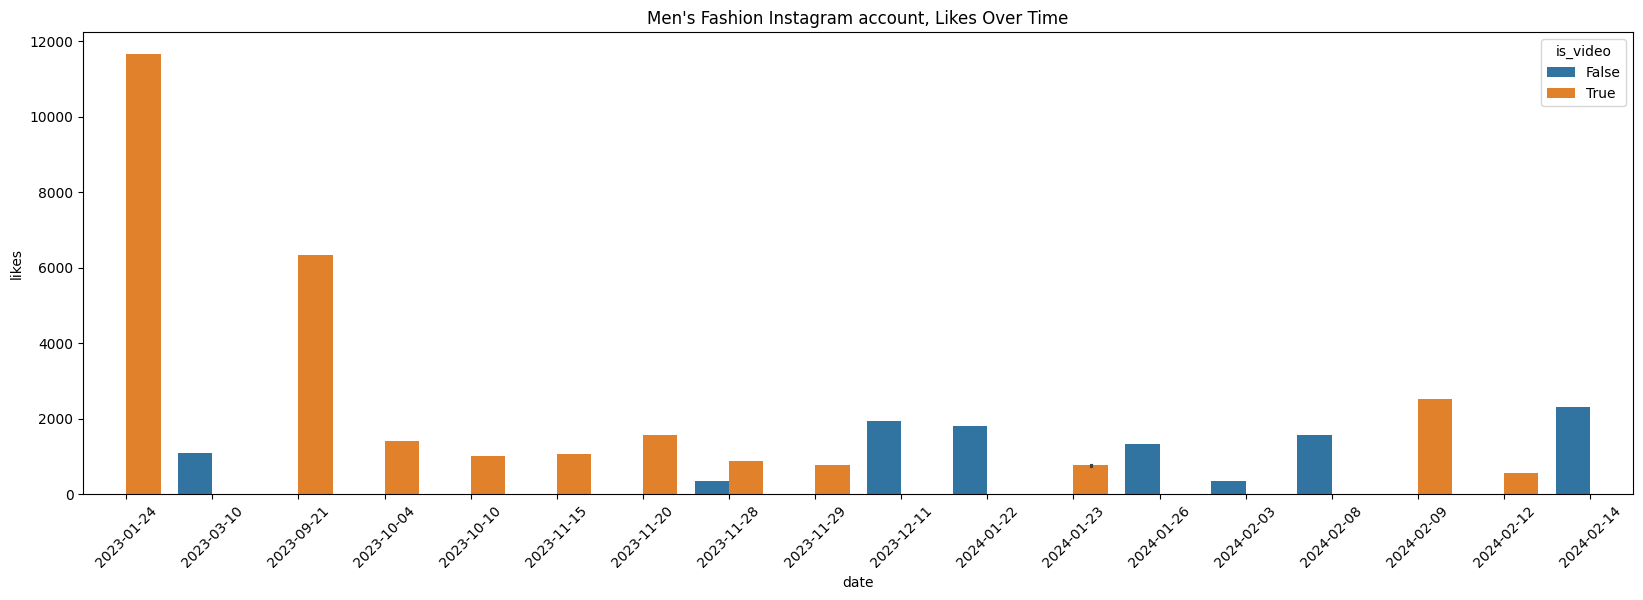

In [11]:
plt.figure(figsize=(20, 6))

ax = sns.barplot(data=mensfashions.sort_values(by="created_at", ascending=True),
            x="date",
            y="likes", 
            hue="is_video")


plt.title("Men's Fashion Instagram account, Likes Over Time")
plt.xticks(rotation=45)
plt.show()

As you can see, the most liked contents of this account is videos.
1. What are these posts about?
2. At what time are these posts typically uploaded? Is there any difference between the upload times of these posts and others?
3. What are the emotions expressed in these posts, and what are the comments on them?

------------

# Based on Emotion

## Emotion of posts Based on location

In [12]:
hashtag_intercept = dict()  # Initialize once, outside the loop

for index in range(len(locational_data["hashtag"])):
    hashtag_list = ast.literal_eval(locational_data["hashtag"][index])

    if len(hashtag_list) > 0:
        code = locational_data["shortcode"][index]
    
        hashtag_intercept[code] = {
            "hashtag": hashtag_list,
            "likes": locational_data["likes"][index],
            "comments": locational_data["comments"][index],
            "location": locational_data["location"][index],
            "emotion": locational_data["most_powerful_emotion"][index],
            "emotion_score": locational_data["emotion_score"][index]
        }

print(hashtag_intercept)


{'CzJtDjegmdI': {'hashtag': ['salem', 'halloween', 'salemjack'], 'likes': 79000, 'comments': 466, 'location': 'salem-massachusetts', 'emotion': 'pos', 'emotion_score': 0.89648557}, 'C1ABSmGMu1d': {'hashtag': ['stopmotions', 'stopmotionslovers', 'stopmotionvideo', 'stopmotionanimation', 'roughanimator', 'aftereffects'], 'likes': 297, 'comments': 25, 'location': 'guayaquil-ecuador', 'emotion': 'pos', 'emotion_score': 0.6716712}, 'C372ffZOk1L': {'hashtag': ['stopmotion', 'stopmotionanimation'], 'likes': 1317, 'comments': 73, 'location': 'guayaquil-ecuador', 'emotion': 'neu', 'emotion_score': 0.62456393}, 'C3VT_Sos__Z': {'hashtag': ['stopmotion', 'Dragonframe', 'Procreate', 'ProcreateDreams.'], 'likes': 680, 'comments': 22, 'location': 'guayaquil-ecuador', 'emotion': 'pos', 'emotion_score': 0.65119904}, 'C0Md_EOs5Ni': {'hashtag': ['Guayaquil!', 'RoughAnimator', 'AfterEffects', 'ThinkEcuador', 'RoughAnimator', 'AfterEffects'], 'likes': 268, 'comments': 7, 'location': 'guayaquil-ecuador', 'e

### analysis of trends in a certain state/city
in this section i want to select a city and then intercept sentiments in given city and emotions behind that hashtag.
for a better analyze i will see what is name of city with most number of instagram posts

In [13]:
locational_data.groupby(by="location", as_index=False).agg({"shortcode":"count"}).sort_values(by="shortcode", ascending=False)

,location,shortcode
688,los-angeles-california,83
933,paris-france,78
762,milan-italy,67
848,new-york-new-york,31
132,berlin-germany,27
...,...,...
546,illinois,1
545,ierland,1
542,hyde-park-corner,1
540,huntington-library-botanical-gardens,1


as you see the LA has most instagram posts and it is a good case for analysis of sentimental over the time 

In [23]:
LA_post = locational_data.loc[locational_data["location"] == "los-angeles-california"].copy()
LA_post['date'] = pd.to_datetime(LA_post['date'])
LA_post.shape

(83, 21)

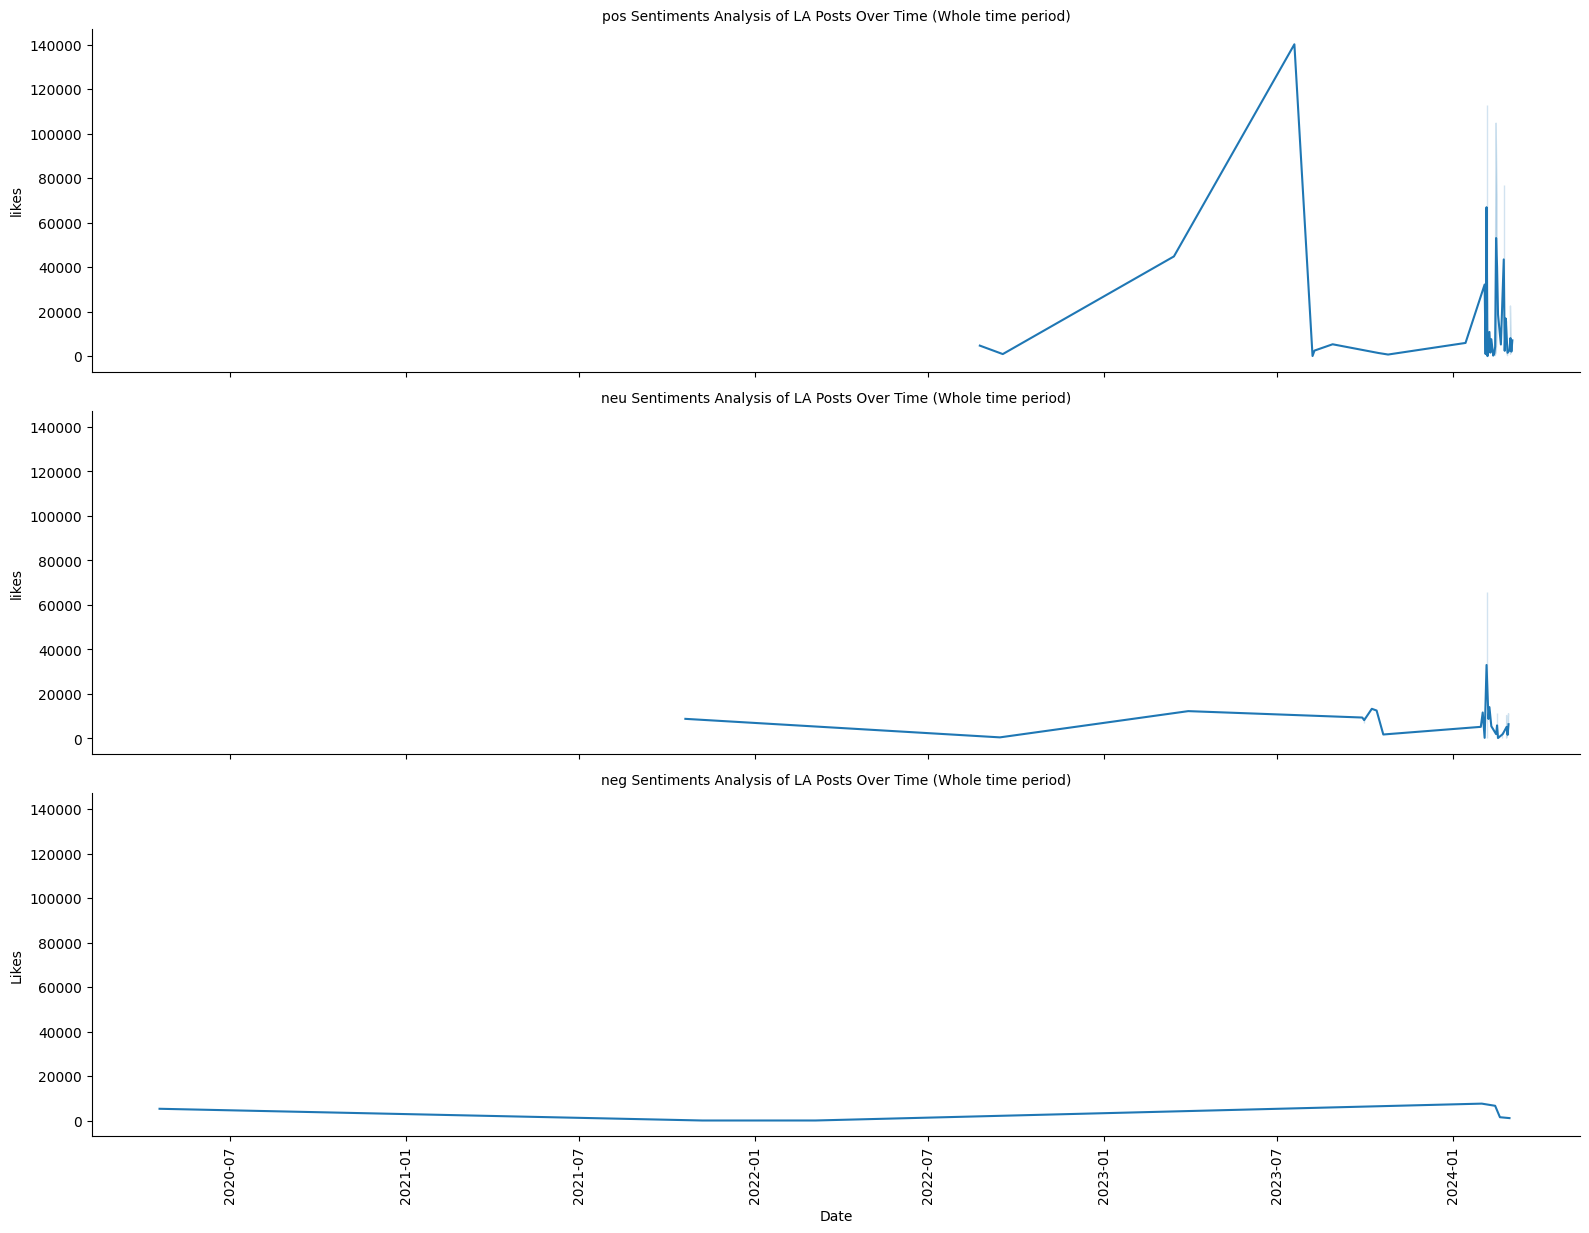

In [24]:
g = sns.FacetGrid(data=LA_post, row="most_powerful_emotion", height=4, aspect=4)
g.map(sns.lineplot, "date", "likes")
plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Likes')
g.set_titles(template="{row_name} Sentiments Analysis of LA Posts Over Time (Whole time period)")
plt.show()

There are not enough data points in the time interval from July 2020 until 2024-01-01. It is better to draw a chart in the time interval of 2024-01-01 to present.

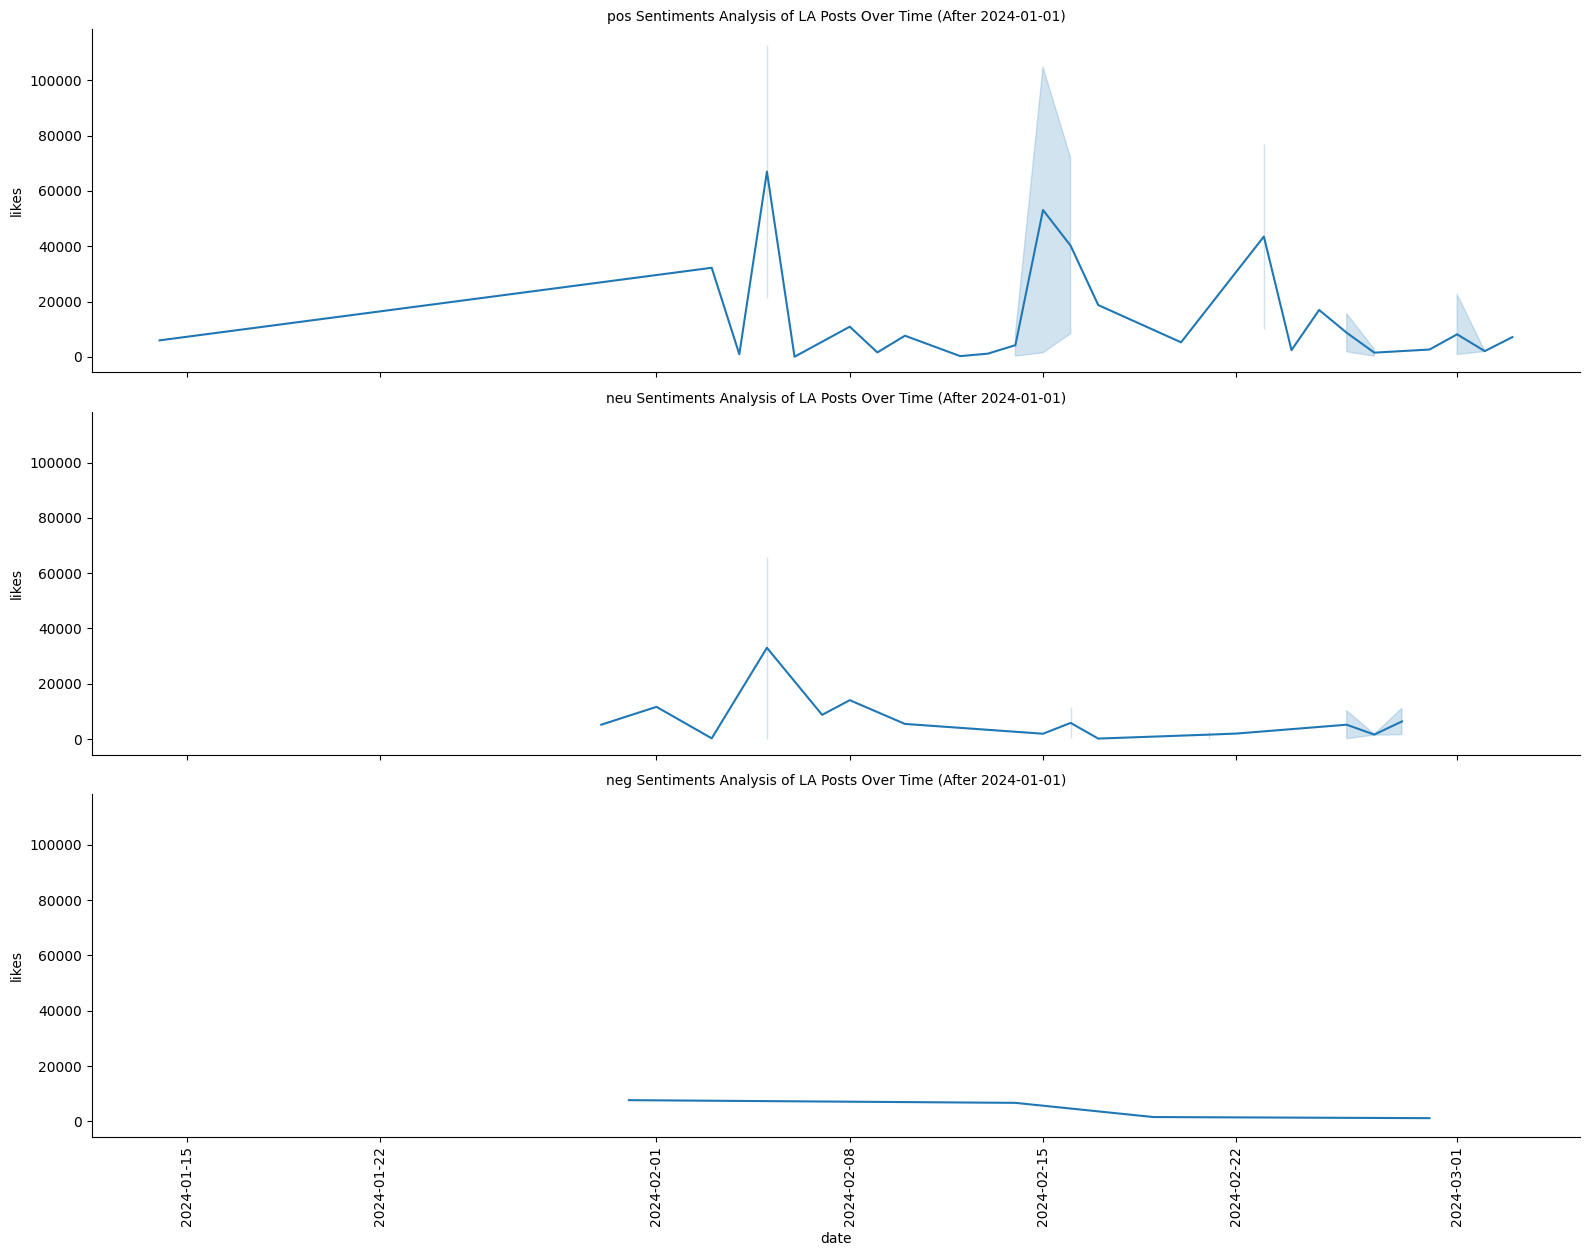

In [26]:
LA_post = LA_post.loc[LA_post['date'] >= '2024-01-01'].copy()
g = sns.FacetGrid(data=LA_post, row="most_powerful_emotion", height=4, aspect=4)
g.map(sns.lineplot, "date", "likes")
g.set_titles(template="{row_name} Sentiments Analysis of LA Posts Over Time (After 2024-01-01)")
plt.xticks(rotation=90)
plt.show()

There isn't enough data with negative emotions, so it's possible to say our data isn't mature and isn't in good condition to discuss emotions based on location.

## sentimental analysis with out considering location

Let's look at sentiment analysis over the globe without considering location.

In [27]:
non_locational_data['date_ordinal'] = pd.to_datetime(non_locational_data['date']).apply(lambda date: date.toordinal())

In [28]:
non_locational_data.head(1)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,...,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time,date_ordinal
0,36063641,christendominique,C3_GS1ASeWI,False,I’m a brunch & Iced Coffee girlie☕️🍳 \n\nTop @...,268,16382,1.709327e+09,https://instagram.flba2-1.fna.fbcdn.net/v/t39....,True,...,2144626.0,1021.0,"{'neg': 0.034616627, 'neu': 0.6108251, 'pos': ...",neu,0.610825,0.776359,[],2024-03-01,20:59:18,738946


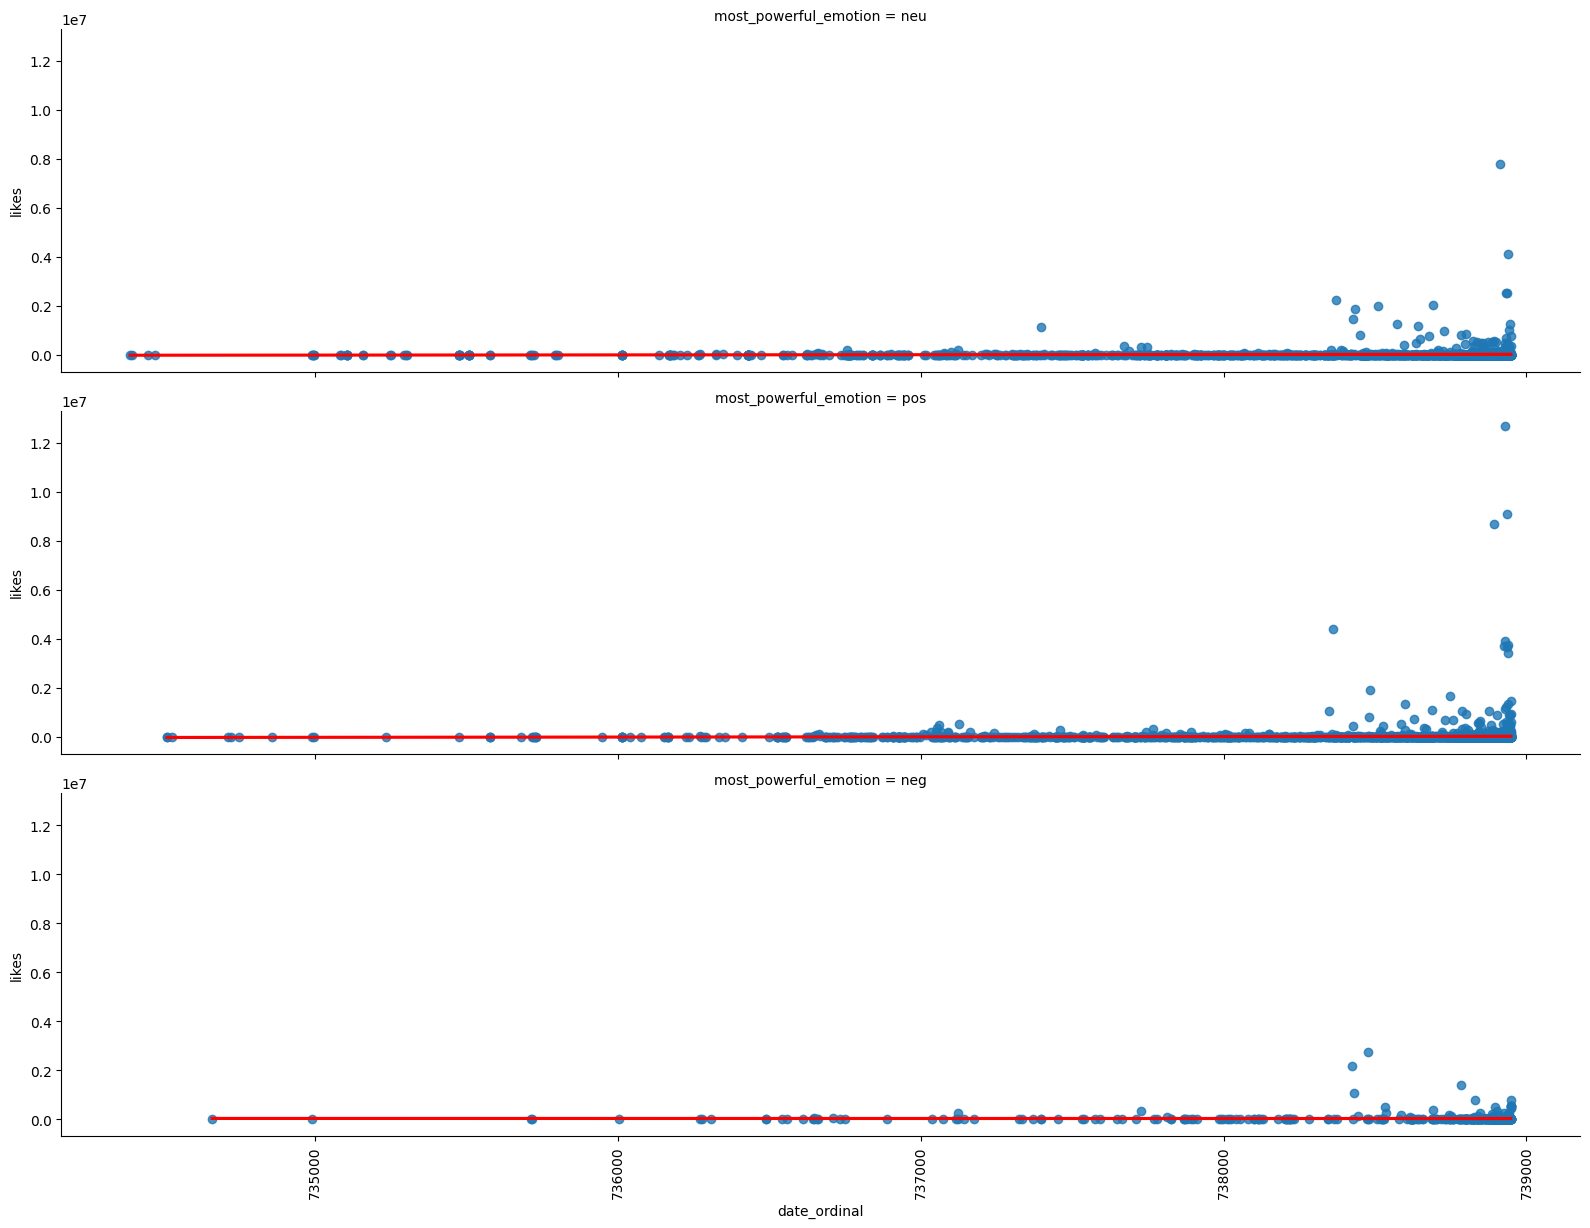

In [29]:
g = sns.FacetGrid(data=non_locational_data, row="most_powerful_emotion", height=4, aspect=4, )
g.map(sns.regplot, "date_ordinal", "likes", line_kws={"color": "red"})
plt.xticks(rotation=90)
plt.show()

Because the number of data points before 2018 is very low, I won't look at this time interval. We will focus on `2024-01-01` to the present.

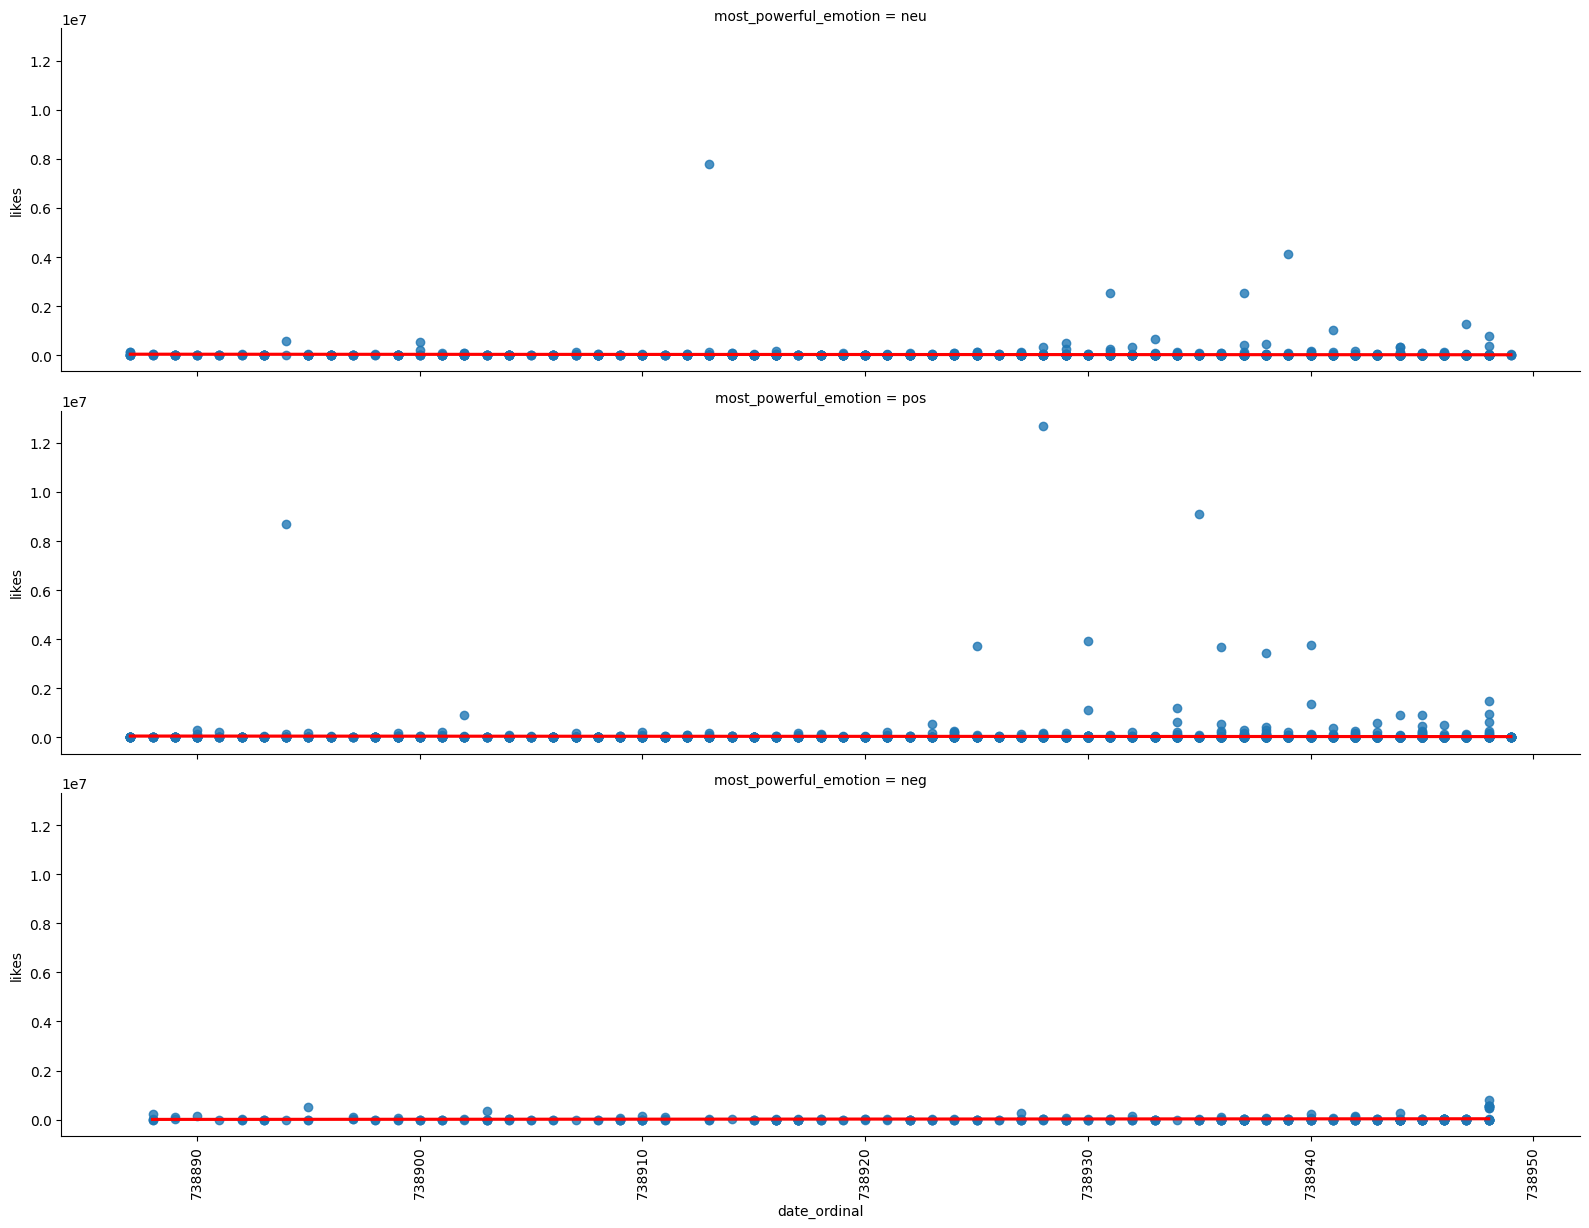

In [32]:
g = sns.FacetGrid(data=non_locational_data.loc[non_locational_data["date"] > '2024-01-01'], row="most_powerful_emotion", height=4, aspect=4,)
g.map(sns.regplot, "date_ordinal", "likes",line_kws={"color": "red"})
plt.xticks(rotation=90)
plt.show()

Effect of posts with Low number of likes on slop of regression is very heavy, to have a good understand of public emotions we must look at post with high number of likes or comments, Based on my researches an viral instagram post get Engagement-Rate over 3.5. so i want to look to posts that are seeing this condition.

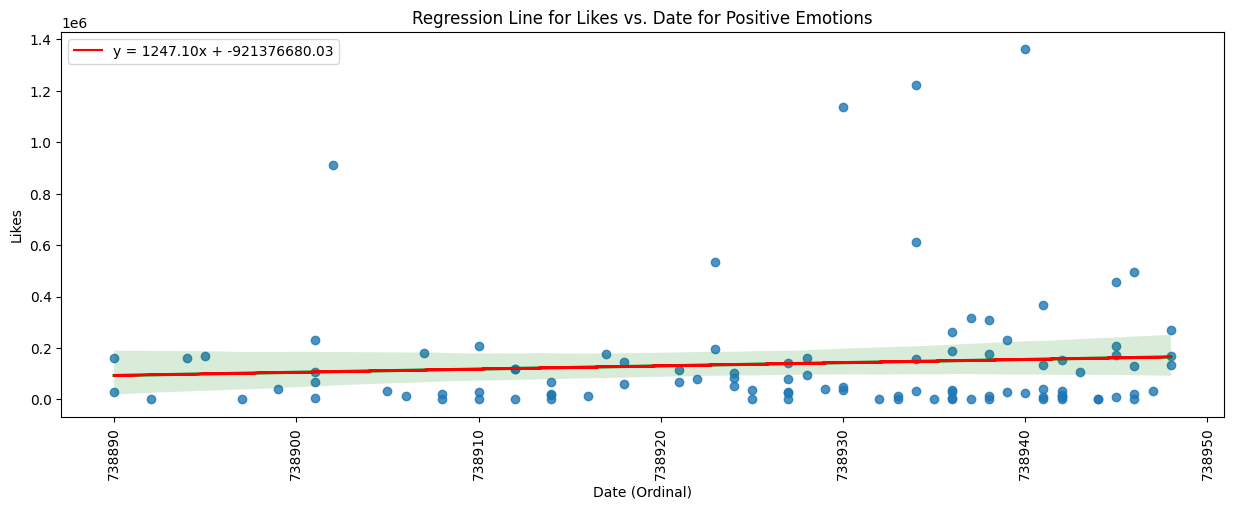

In [33]:
filtered_data = non_locational_data.loc[
    (non_locational_data["date"] > '2024-01-01') &
    (non_locational_data["engagement_rate(%)"] >= 3.5) & 
    (non_locational_data["most_powerful_emotion"] == "pos")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "green"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for Positive Emotions')
plt.legend()
plt.show()

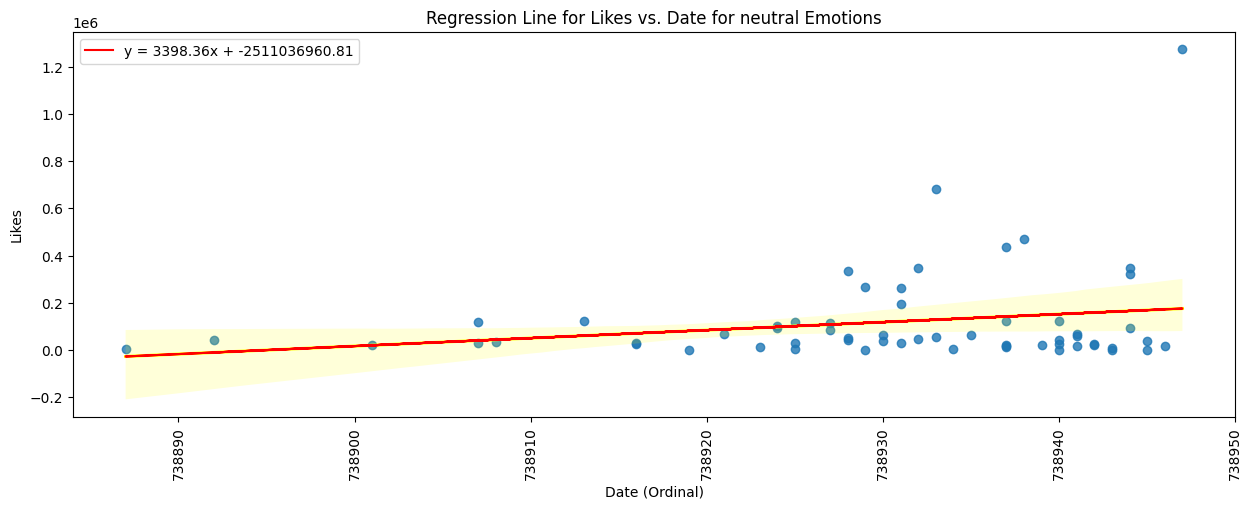

In [34]:
filtered_data = non_locational_data.loc[
    (non_locational_data["date"] > '2024-01-01') &
    (non_locational_data["engagement_rate(%)"] >= 3.5) & 
    (non_locational_data["most_powerful_emotion"] == "neu")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for neutral Emotions')
plt.legend()
plt.show()

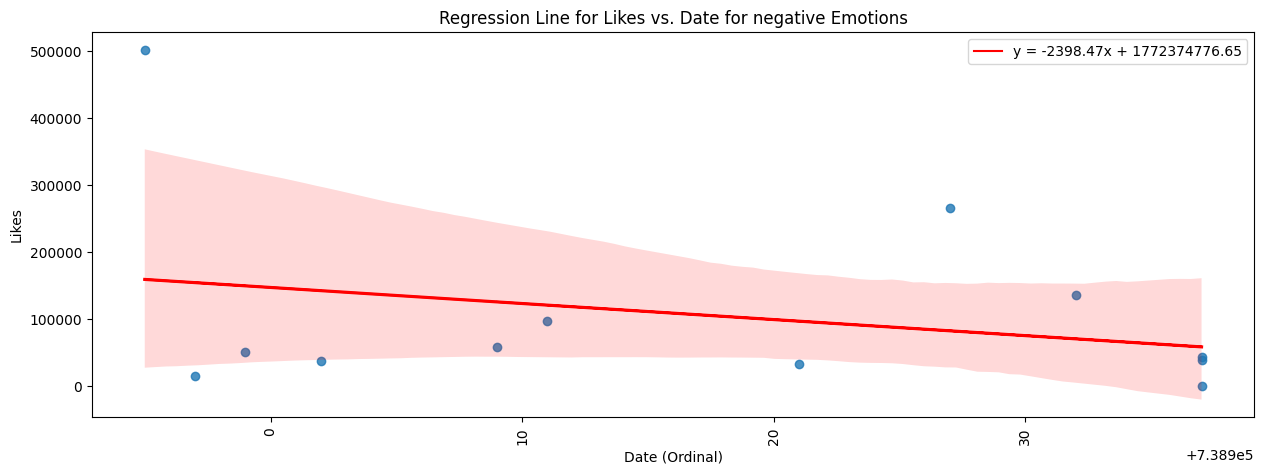

In [35]:
filtered_data = non_locational_data.loc[
    (non_locational_data["date"] > '2024-01-01') &
    (non_locational_data["engagement_rate(%)"] >= 3.5) & 
    (non_locational_data["most_powerful_emotion"] == "neg")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "red"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for negative Emotions')
plt.legend()
plt.show()

----------

# Hashtag analysis

What are the most frequently employed hashtags? How do these hashtags manifest emotions, influenced by time?

In [36]:
hashtag_count = dict()
def hashtag(row):
    hashtag = ast.literal_eval(row["hashtag"])
    for hash in hashtag:

        if hash in hashtag_count:
            hashtag_count[f'{hash}'] += 1
        else:
            hashtag_count[f'{hash}'] = 1
    
non_locational_data.apply(hashtag, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6839    None
6840    None
6841    None
6842    None
6843    None
Length: 6844, dtype: object

In [37]:
print(hashtag_count)
max_key = max(hashtag_count, key=lambda k: hashtag_count[k])
print(hashtag_count[max_key])
max_key


{'browtips': 1, 'eyebrowtutorial': 2, 'browmakeup': 1, 'makeup': 34, 'makeuptips': 1, 'sigmaxchristendominique': 1, 'makeupforbeginners': 2, 'beginnermakeup': 1, 'makeuptutorial': 9, '90smakeup': 2, 'sbxambassador': 2, 'glammakeup': 1, 'pamelaanderson': 1, 'contour': 2, 'contourtutorial': 2, 'nofoundationmakeup': 1, 'nofoundation': 1, 'everydaymakeup': 1, 'browneyesmakeup': 1, 'TooFacedPartner': 1, 'cozypinkmakeup': 1, 'girlsnightin': 1, 'grwm': 9, 'girltalk': 1, 'valentinesmakeup': 1, 'makeuptutorials': 2, 'girlsintheir30s': 1, 'over30': 1, 'birthdaygirl': 2, 'hairtransformation': 1, 'haircolor': 4, 'transformation': 5, 'birdphotographymasterclass': 1, 'birdsofparadise': 1, 'hornbills': 1, 'birds': 3, 'masterclass': 1, 'birdphotography': 1, 'LiveForTheStory': 6, 'CanonAmbassador': 4, 'natureinfocus': 2, 'bonobo': 2, 'DRC': 2, 'CanonR5': 2, 'photojournalism': 19, 'canonambassador': 2, 'taillebourg': 1, 'artforsale': 1, 'artgallery': 1, 'liveforTheStory': 2, 'canonAmbassador': 1, 'canon

'love'

To see next top hashtag, run this cell:

In [38]:
# hashtag_count.pop('love')

#### most used hashtag is **`#love`** which used 79 times in whole *`non_locational`* dataset

## Hashtag Finder 

### #Love

Finding Row's which including #love and appending them to a new dataframe

In [39]:

columns = non_locational_data.columns.values.tolist()
certain_hashtag = pd.DataFrame(columns=columns)

def hashtag(row):
    hashtag = ast.literal_eval(row["hashtag"])
    love_list = ["LOVE", "Love", "LOve", "LOVe", "love"]
    for love in love_list:
        if (love in hashtag):
            certain_hashtag.loc[len(certain_hashtag)] = row
    
non_locational_data.apply(hashtag, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6839    None
6840    None
6841    None
6842    None
6843    None
Length: 6844, dtype: object

In [40]:
certain_hashtag.head(2)

,owner_id,owner_username,shortcode,is_video,caption,comments,likes,created_at,imageUrl,multiple_images,...,followers,following,caption_emotions,most_powerful_emotion,emotion_score,engagement_rate(%),hashtag,date,time,date_ordinal
0,621649003,deemabayyaa,C207lmai_9H,True,With affection from Sweden 🇸🇪\n#deemabayyaa #s...,24,628,1706838471.0,https://instagram.fkiv3-1.fna.fbcdn.net/v/t51....,False,...,1755532.0,637.0,"{'neg': 0.06723274, 'neu': 0.31909016, 'pos': ...",pos,0.613677,0.03714,"['deemabayyaa', 'sweden', 'stockholm', 'love',...",2024-02-02 00:00:00,01:47:51,738918
1,2979242389,destinationwolf,Ceq2tTQOWQE,True,Reality of Little Venice vs Instagram 😅😅😅\n\nT...,18,708,1654960535.0,https://instagram.flhr13-1.fna.fbcdn.net/v/t51...,False,...,351168.0,1.0,"{'neg': 0.15532492, 'neu': 0.429469, 'pos': 0....",neu,0.429469,0.206739,"['italy', 'destinationwolf', 'tourists', 'trav...",2022-06-11 00:00:00,15:15:35,738317


In [41]:
# set datatypes in certain_hashtag data frame
certain_hashtag["likes"] = certain_hashtag['likes'].astype(int)
certain_hashtag["comments"] = certain_hashtag['comments'].astype(int)
certain_hashtag["created_at"] = certain_hashtag['created_at'].astype(float)
certain_hashtag["followers"] = certain_hashtag['followers'].astype(int)
certain_hashtag["following"] = certain_hashtag['following'].astype(int)
certain_hashtag["emotion_score"] = certain_hashtag['emotion_score'].astype(float)
certain_hashtag["engagement_rate(%)"] = certain_hashtag["engagement_rate(%)"].astype(float)
certain_hashtag["date_ordinal"] = certain_hashtag["date_ordinal"].astype(int)

### '#Love' sentimental analysis over time

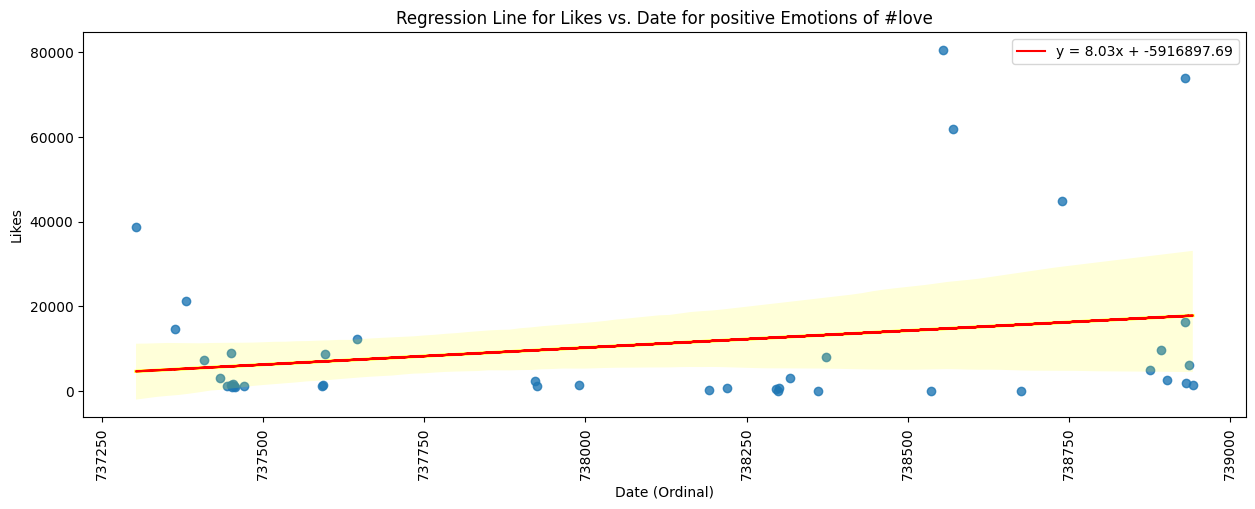

In [42]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "pos")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for positive Emotions of #love')
plt.legend()
plt.show()

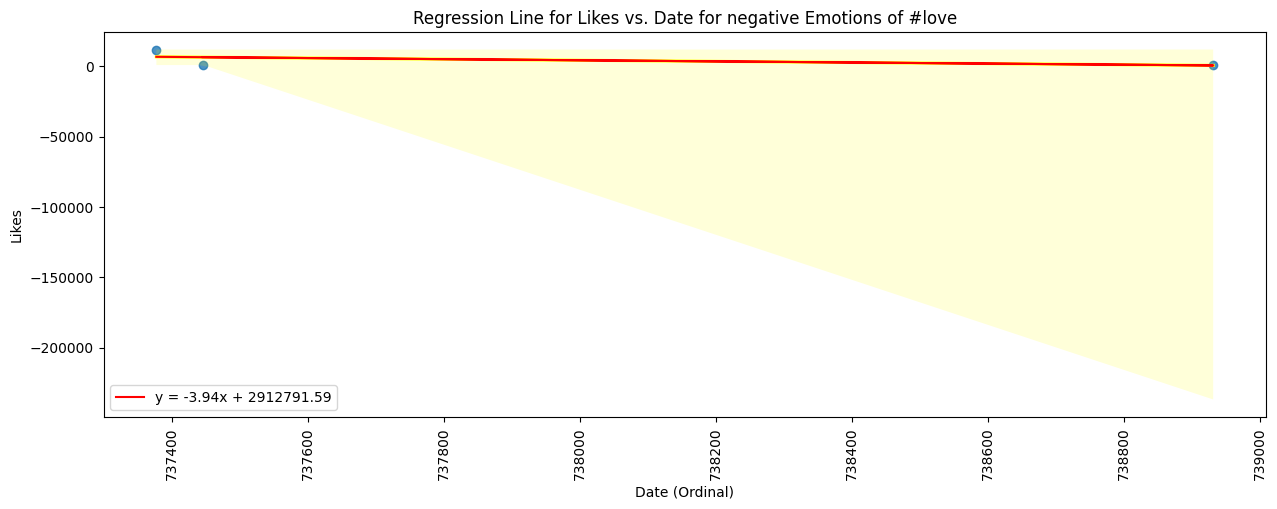

In [43]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neg")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for negative Emotions of #love')
plt.legend()
plt.show()

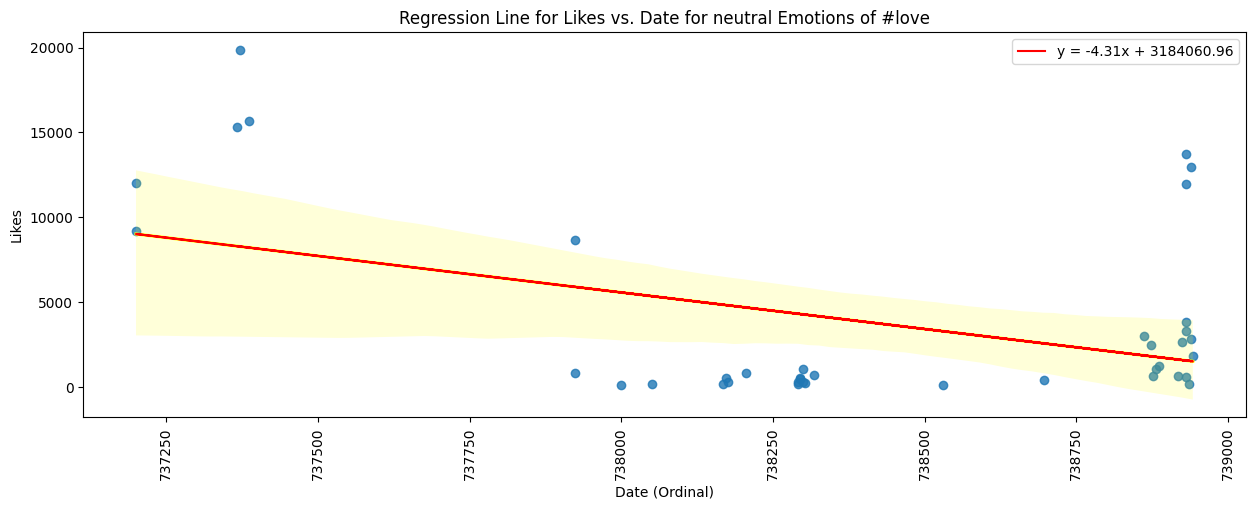

In [44]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neu")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for neutral Emotions of #love')
plt.legend()
plt.show()

Since #love isn't suitable for sentiment analysis of negative hashtags, I want to analyze the next top-used hashtag in the dataset: #AD, with 56 usages.

### #AD

In [45]:
columns = non_locational_data.columns.values.tolist()
certain_hashtag = pd.DataFrame(columns=columns)

def hashtag(row):
    hashtag = ast.literal_eval(row["hashtag"])
    love_list = ["Ad", "ad", "AD", "ADS", "ADs", "Ads", "ads"]
    for love in love_list:
        if (love in hashtag):
            certain_hashtag.loc[len(certain_hashtag)] = row
    
non_locational_data.apply(hashtag, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6839    None
6840    None
6841    None
6842    None
6843    None
Length: 6844, dtype: object

In [46]:
certain_hashtag["likes"] = certain_hashtag['likes'].astype(int)
certain_hashtag["comments"] = certain_hashtag['comments'].astype(int)
certain_hashtag["created_at"] = certain_hashtag['created_at'].astype(float)
certain_hashtag["followers"] = certain_hashtag['followers'].astype(int)
certain_hashtag["following"] = certain_hashtag['following'].astype(int)
certain_hashtag["emotion_score"] = certain_hashtag['emotion_score'].astype(float)
certain_hashtag["engagement_rate(%)"] = certain_hashtag["engagement_rate(%)"].astype(float)
certain_hashtag["date_ordinal"] = certain_hashtag["date_ordinal"].astype(int)

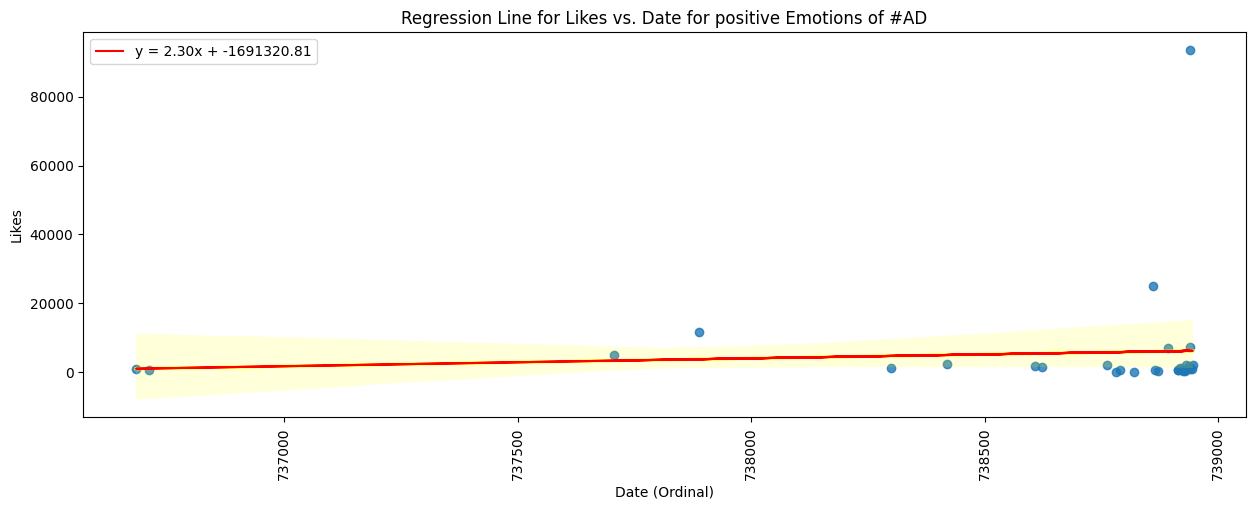

In [47]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "pos")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for positive Emotions of #AD')
plt.legend()
plt.show()

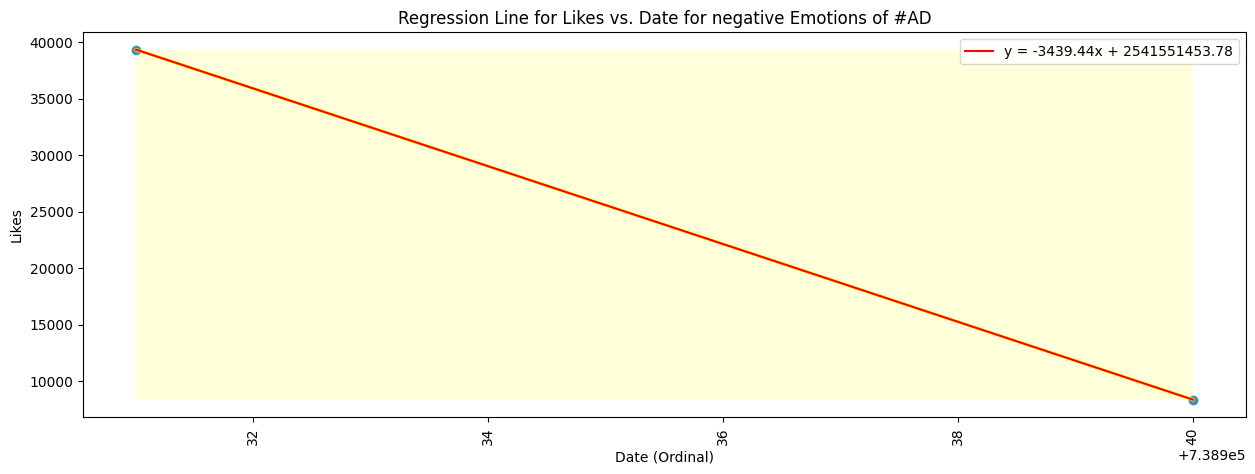

In [48]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neg")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for negative Emotions of #AD')
plt.legend()
plt.show()

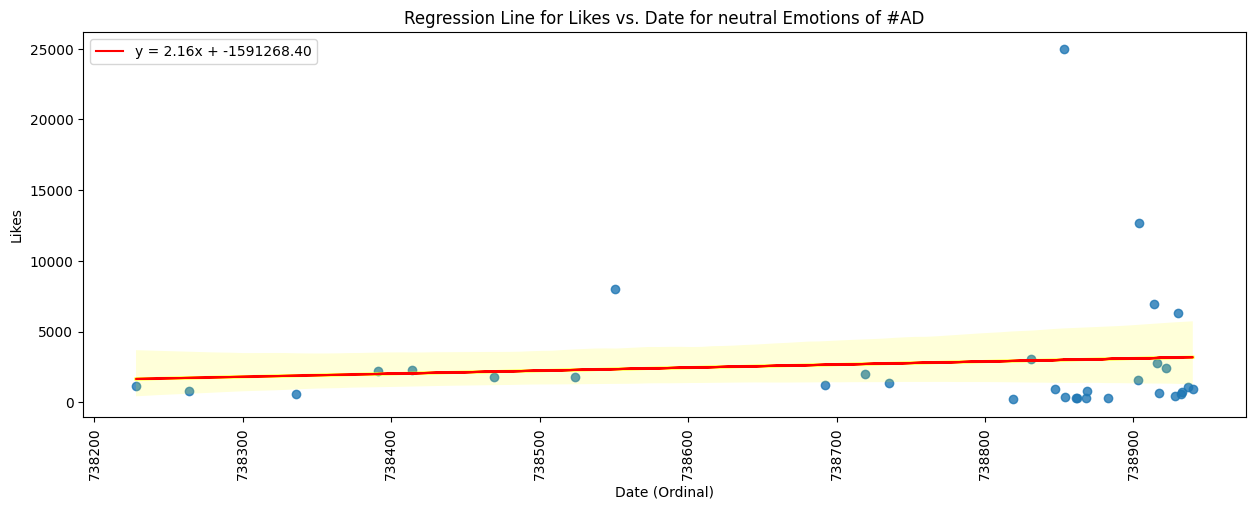

In [50]:
filtered_data = certain_hashtag.loc[
    (non_locational_data["most_powerful_emotion"] == "neu")
].copy()


plt.figure(figsize=(15, 5))
sns.regplot(data=filtered_data, x="date_ordinal", y="likes", line_kws={"color": "yellow"})
plt.xticks(rotation=90)

model = LinearRegression()
model.fit(filtered_data[["date_ordinal"]], filtered_data["likes"])

slope = model.coef_[0]
intercept = model.intercept_

plt.plot(filtered_data["date_ordinal"], model.predict(filtered_data[["date_ordinal"]]), color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Date (Ordinal)')
plt.ylabel('Likes')
plt.title('Regression Line for Likes vs. Date for neutral Emotions of #AD')
plt.legend()
plt.show()